# Data Games Research

The task of this research is identify patterns that determines the success of a game. This will allow to bet on potentially popular product and plan advertising campaigns.

The dataset shows historical data on games sales, user and expert ratings genres and platforms like Xbox or PlayStation.

# Exploration Data Analysis 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
data = pd.read_csv(r'C:\Users\pinos\Desktop\statistics\games.csv')

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We look at general statistical data and visualize the data set using histograms.

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

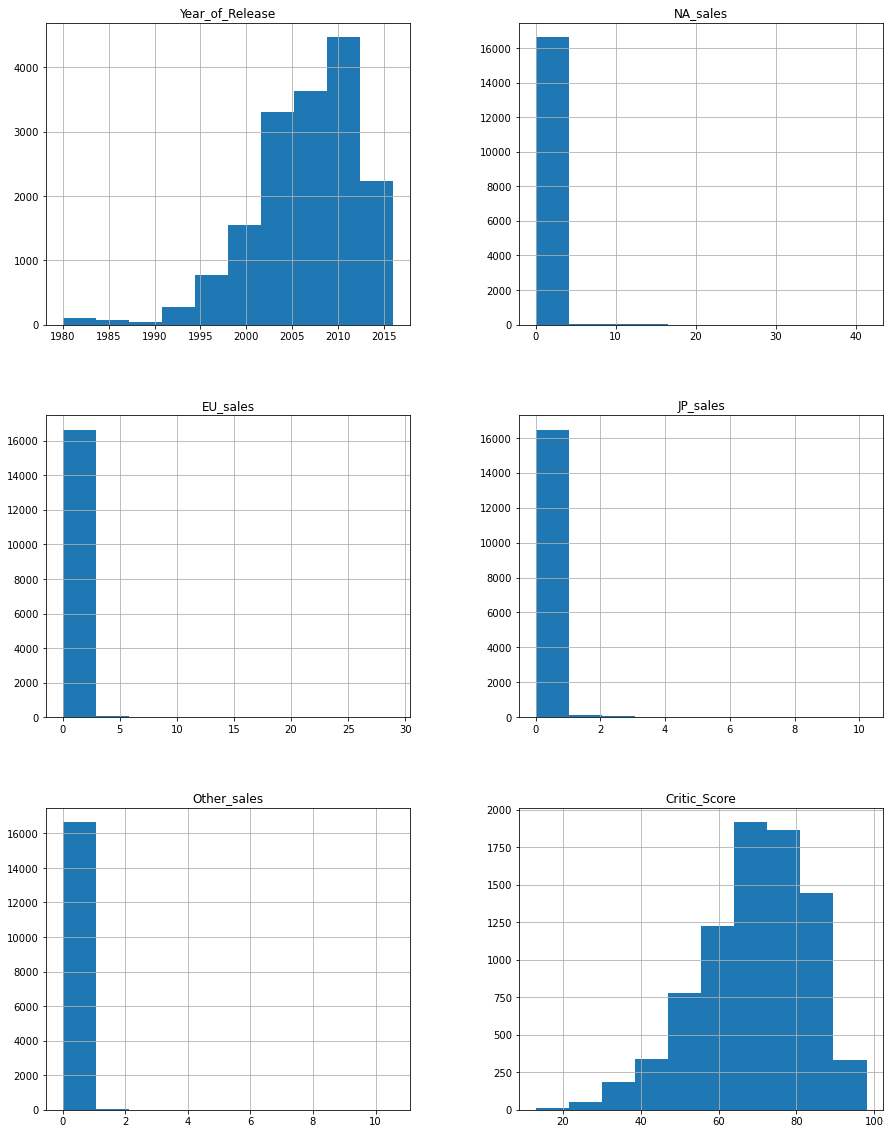

In [7]:
data.hist(figsize=(15, 20))

We change the column names to lowercase.

In [9]:
data.columns = data.columns.str.lower()

In [10]:
# checking

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Data Preparation

We study the types of data we have.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


The critic_score column we are going to change their type to float and int, which would be the most logical step if we take into account what is observed in the table.

In [13]:
data['critic_score'] = data['critic_score'].astype('Int64')

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [15]:
data['user_score'] = data['user_score'].astype('float64')

user_score generates problems with the initials "tbd", which according to the Cambridge English Dictionary means "to be decided or to be determined" and is used when something is not yet defined, so in our case it had to be changed to nan.

In [16]:
# just checking the changes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.2+ MB


In [17]:
def percentages_lost():
    
    return data.isna().sum() / len(data) * 100

percentages_lost()

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

The variables dedicated to the rating are those that have the largest number of missing values, their percentage varies from 40 percent or more to more than half of the values, as in the case of user_score and the aforementioned 'tbd', we switched to nan, because we must not forget that the type of this variable is float, not string. Rating we change the missing values to unknown ones.

In [18]:
data['rating'] = data['rating'].replace(np.nan, 'unknown')

In [19]:
# checking the chages

data['rating']

0              E
1        unknown
2              E
3              E
4        unknown
          ...   
16710    unknown
16711    unknown
16712    unknown
16713    unknown
16714    unknown
Name: rating, Length: 16715, dtype: object

The rest of the missing data has a low percentage, which in any case will not affect the analysis, so we get rid of them.

In [20]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=False)

In [21]:
# checking the changes again

data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.000000
dtype: float64

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [23]:
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

We can exclude the last four categories.

In [24]:
data = data.loc[(data['rating'] != 'EC') & (data['rating'] != 'K-A') &
         (data['rating'] != 'RP') & (data['rating'] != 'AO')]

We summarize all sales by region and record them in the total_sales column.

In [25]:
data['total_sales'] = data[[
    
    'na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


In this first section, we discussed the types of data we have in the dataset, and we changed it logically to better analyze them. We also observed and processed missing values, observing the highest percentages of these values in the columns associated with the rating and ratings of critics and users. 

As a result, we applied the most appropriate methods, leaving unchanged those columns in which we could not exclude or change them, because they would negatively affect the analysis. 

In addition, we removed the categories in the rating column that had few values, and created a new column in which the total sales of games are calculated.

# Research Data Analysis

We created a histogram to see how many games were released in a year.

Text(0, 0.5, 'Number of games')

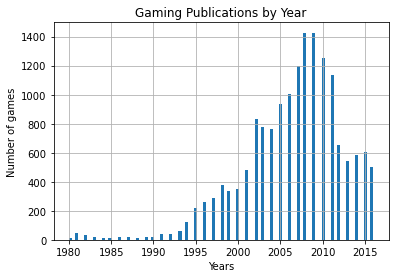

In [43]:
data['year_of_release'].hist(
    
    bins=100, 
    
    range=(1980, 2016)

)

plt.title("Gaming Publications by Year")

plt.xlabel("Years")

plt.ylabel("Number of games")

Since the mid-90s, there has been an upward trend. In the 2000s, we can talk about a sharp increase in the number of games going on sale, with certain ups and downs. After the boom, the sharpest decline occurred in 2012.

We moved on to analyzing the platforms that had the most sales.

In [29]:
sum_platform = data.groupby(
    
    'platform'
    
)[
    
    'total_sales'
    
].sum().sort_values(ascending=False)

In [30]:
sum_platform.head(6)

platform
PS2     1233.32
X360     961.24
PS3      931.34
Wii      890.52
DS       802.13
PS       725.67
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'PS2 Games Distributions by Year\n')

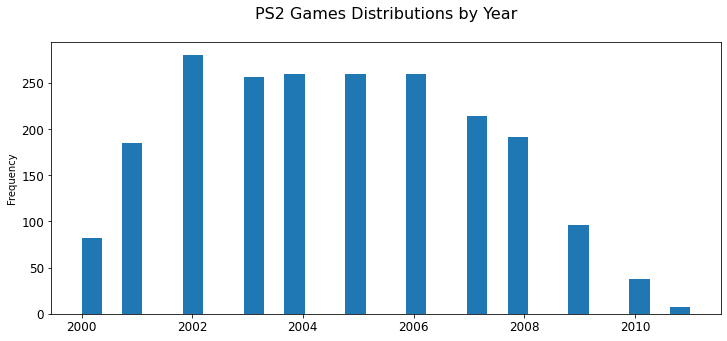

In [44]:
(data.query('platform == "PS2"')['year_of_release']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('PS2 Games Distributions by Year' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

From 2000 to 2002, there was a tendency to increase the number of games on sale. From 2003 to 2006 there is a stabilization, and since 2007-a fall.

Text(0.5, 1.0, 'X360 Games Distributions by Year\n')

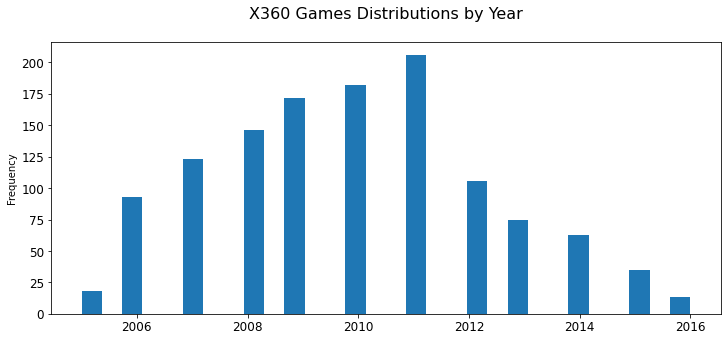

In [45]:
(data.query('platform == "X360"')['year_of_release']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('X360 Games Distributions by Year' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

This platform follows a model similar to the previous one, with the only difference that instead of a stabilization period, there is a continuous growth until 2011, and then a sharp drop.

Text(0.5, 1.0, 'PS3 Games Distributions by Year\n')

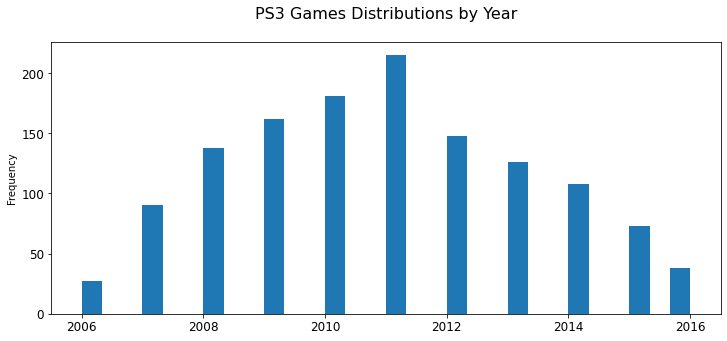

In [46]:
(data.query('platform == "PS3"')['year_of_release']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('PS3 Games Distributions by Year' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

Similar to the previous one, only the figure shows a more pronounced bell shape.

Text(0.5, 1.0, 'Wii Games Distributions by Year\n')

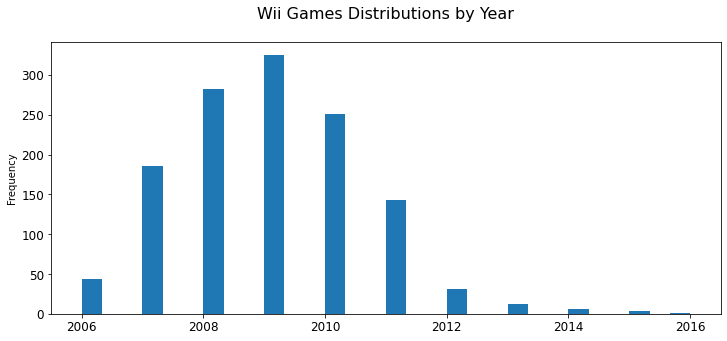

In [47]:
(data.query('platform == "Wii"')['year_of_release']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Wii Games Distributions by Year' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

The Wii platform shows the same trend as the previous ones, with the difference that since 2012 it has been mainly striving to disappear from the market.

Text(0.5, 1.0, 'DS Games Distributions by Year\n')

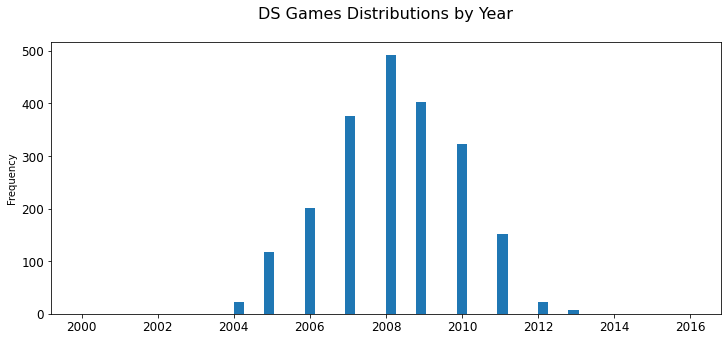

In [48]:
(data.query('platform == "DS"')['year_of_release']
 
     .plot(kind= 'hist',
           
           bins=60, 
           
           range=(2000, 2016),
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('DS Games Distributions by Year' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

This platform disappears from the market much earlier than the previous one, and in 2014 and 2016 it no longer produces games.

Text(0.5, 1.0, 'PS Games Distributions by Year\n')

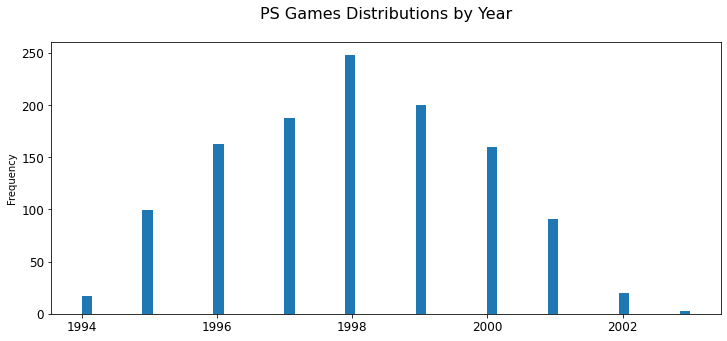

In [49]:
(data.query('platform == "PS"')['year_of_release']
 
     .plot(kind= 'hist',
           
           bins=60, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('PS Games Distributions by Year' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

The PS platform has an earlier historical experience than others, but has stopped selling games since 2003, which coincides with the appearance of the new PS2 model.

In conclusion, we can say that all platforms retain the same trend pattern, but some disappear earlier than others. All this corresponds to the general histogram of all platforms shown at the beginning.

Some platforms are disappearing because the same company is releasing a newer model, but now we need to study those platforms that may be disappearing due to wear and tear or lack of sales, which we will consider in the next step.

In [50]:
platforms_sales = pd.pivot_table(
    
    data, 
    
    index = ['platform', 'year_of_release'], 
    
    values = 'total_sales', 
    
    aggfunc='median').sort_values(by = 'total_sales', ascending = False)


In [51]:
platforms_sales.head()

total_sales
platform year_of_release             
GEN      1991.0                 4.330
GB       1994.0                 3.910
GEN      1990.0                 2.600
PC       1997.0                 2.365
         1994.0                 2.240

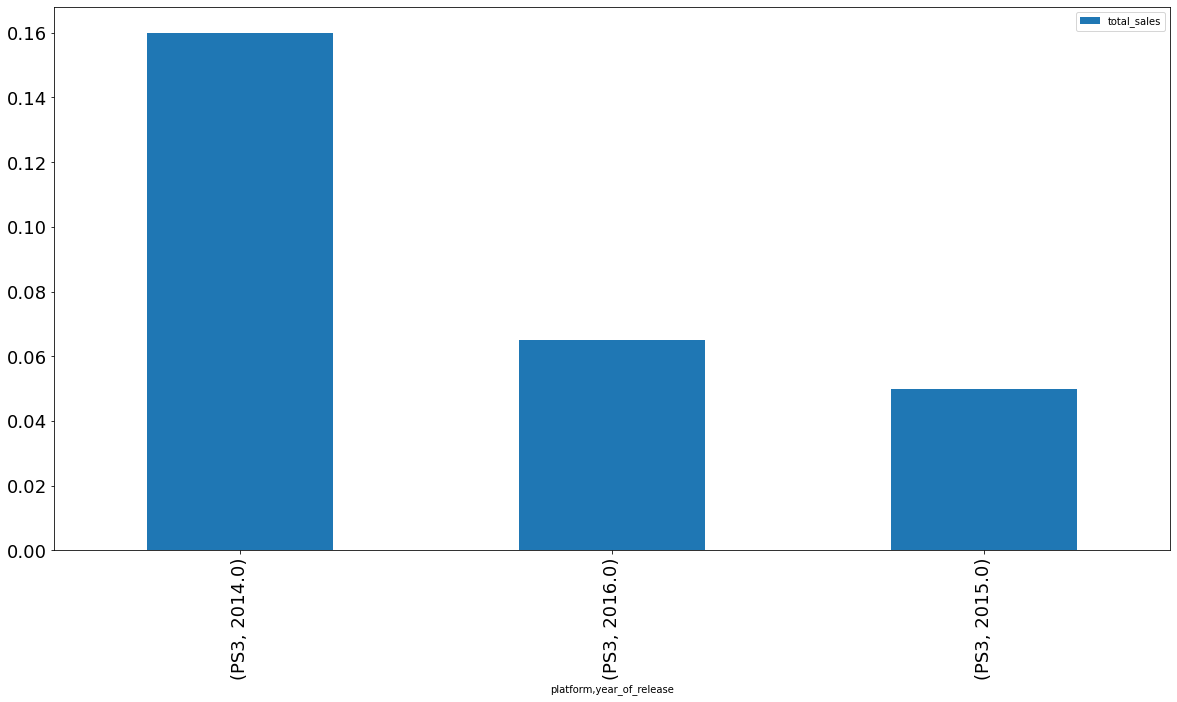

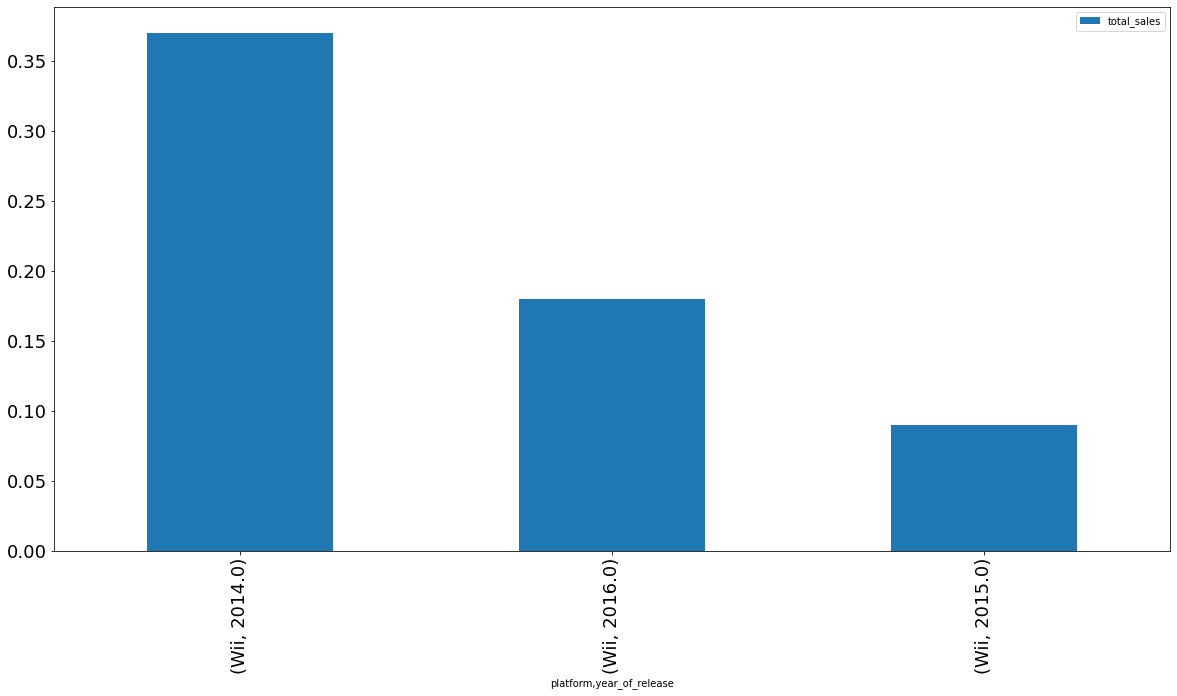

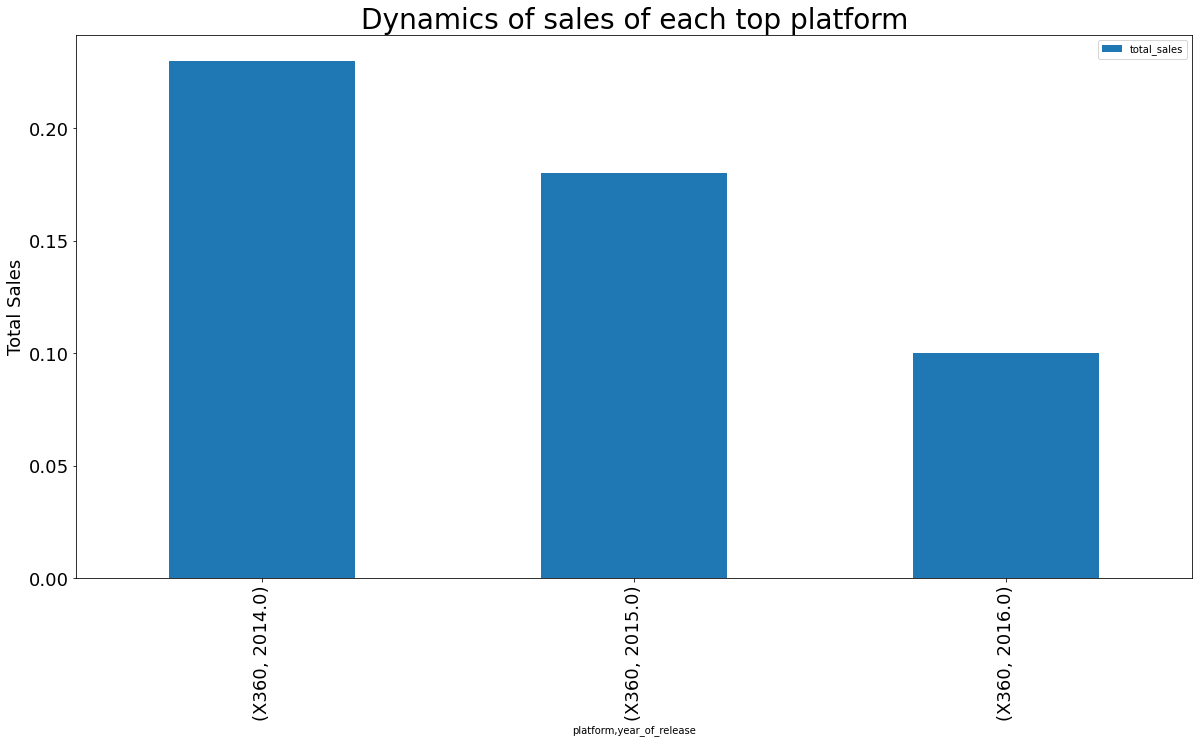

In [52]:
top_platforms = [
    
    'PS2',
    
    'X360',
    
    'PS3',
    
    'Wii',
    
    'DS',
    
    'PS' ]

super_growth = platforms_sales.query(
    
    'platform in @top_platforms & year_of_release >= 2014 & year_of_release < 2017'

).groupby('platform').plot(kind='bar', figsize=(20, 10),fontsize=18)

plt.ylabel('Total Sales', fontdict={'fontsize': 18})

plt.title('Dynamics of sales of each top platform', fontdict={'fontsize': 28})  

plt.show()

As we can see, the trend of the six platforms that brought the most sales during the analyzed period is downward, sales on all of them gradually decrease over the years.

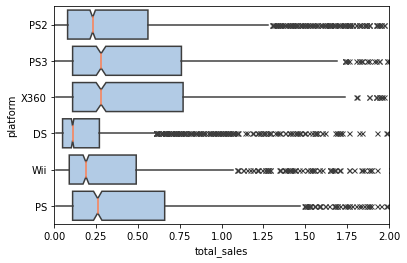

In [53]:
box_plot = data.query(
    
    'platform in @top_platforms'

).sort_values(by = 'total_sales')
    
ax = sns.boxplot(
    
    data=box_plot, x="total_sales", y="platform",
    
    notch=True, showcaps=False,
    
    flierprops={"marker": "x"},
    
    boxprops={"facecolor": (.4, .6, .8, .5)},
    
    medianprops={"color": "coral"},
)
ax.set(xlim=(0, 2))

plt.show()

The overlap of the fields tells us that all platforms follow a very similar distribution, that is, sales follow a very similar evolution, so we cannot say that the data between the platforms differs significantly. If we had to point out the ones that are most different from the rest, we would say that these are DS and Wii, but with minimal and minor differences.

Another similarity is that they all have a large number of outliers. This may be due to the publication of specific games with astronomical sales.

Now we are going to investigate how user ratings and critics affect sales on one of the most popular sites.

In [54]:
review_and_sales = data.query('platform == "PS2"').copy()

In [55]:
review_and_sales['critic_score'] = review_and_sales[
    
    'critic_score'].astype('float64')

In [56]:
review_and_sales['critic_score'].corr(review_and_sales['total_sales'])

0.39253647544509

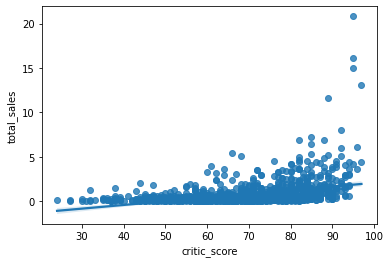

In [57]:
sns.regplot(
    
    x="critic_score", 
    
    y="total_sales", 
    
     data = review_and_sales)

plt.show()

The correlation coefficient shows a moderate relationship between sales and critical evaluation.

In [58]:
review_and_sales['user_score'].corr(review_and_sales['total_sales'])

0.17492454775942587

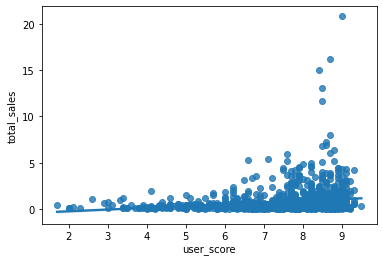

In [59]:
sns.regplot(
    
    x="user_score", 
    
    y="total_sales", 
    
     data = review_and_sales)

plt.show()

The correlation coefficient shows a weak relationship between sales and user ratings.

We choose another popular platform to see if we can extrapolate the relationship results to other platforms.

In [61]:
review_and_sale = data.query('platform == "X360"').copy()

In [62]:
review_and_sale['critic_score'] = review_and_sale[
    
    'critic_score'].astype('float64')

In [63]:
review_and_sale['critic_score'].corr(review_and_sale['total_sales'])

0.3928658925400701

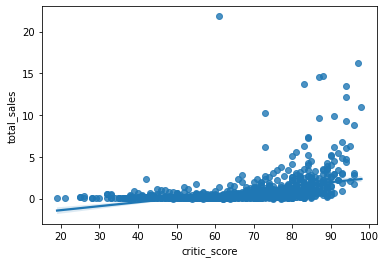

In [64]:
sns.regplot(
    
    x="critic_score", 
    
    y="total_sales", 
    
     data = review_and_sale)

plt.show()

In [65]:
review_and_sale['user_score'].corr(review_and_sale['total_sales'])

0.11418661214018037

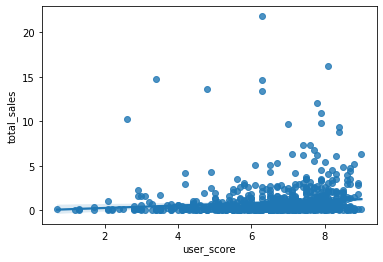

In [66]:
sns.regplot(
    
    x="user_score", 
    
    y="total_sales", 
    
     data = review_and_sale)

plt.show()

In fact, the results are similar, there is a moderate relation between sales and user ratings and a weak relation between sales and critics ratings. We can extrapolate the results to other platforms and say that ratings and reviews have almost no effect on sales.

We are looking at the distribution of games by genre.

In [68]:
game_genre = pd.pivot_table(
    
    data,
    
    index=["genre"], 
    
    values=["total_sales"],
    
    aggfunc=('median')).sort_values(by='total_sales', ascending=False)

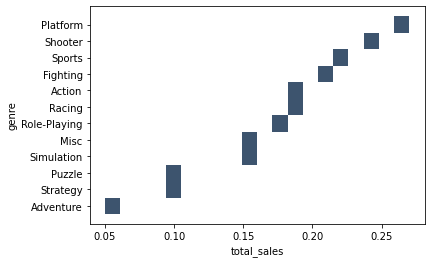

In [69]:
sns.histplot(data=game_genre, x="total_sales", y='genre', shrink=.8, bins=20)

plt.show()

Platformer, shooter and sports bring the most sales. Adventure, strategy, and puzzle games are the least sold.

# User profile by region

Now let's analyze the user profile by region.

In [70]:
north_america = pd.pivot_table(
    
    data, 
    
    index='platform', 
    
    values='na_sales',
    
    aggfunc='sum'
    
).sort_values(by='na_sales', ascending=False)


In [71]:
north_america.head()

,na_sales
platform,
X360,595.74
PS2,572.80
Wii,486.25
PS3,390.13
DS,379.70


We filter by the result obtained.

In [73]:
top5_na = north_america.query('na_sales > 380')

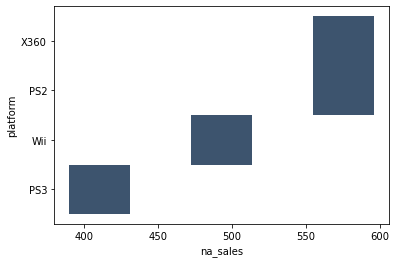

In [74]:
sns.histplot(
    
    data=top5_na, 
    
    x="na_sales", 
    
    y='platform', bins=5)

plt.show()

In North America, the user prefers X360, PS2 and Wii.

In [75]:
europe = pd.pivot_table(
    
    data, 
    
    index='platform', 
    
    values='eu_sales',
    
    aggfunc='sum'
    
).sort_values(by='eu_sales', ascending=False)


In [76]:
europe.head()

,eu_sales
platform,
PS2,332.54
PS3,327.21
X360,268.32
Wii,258.32
PS,212.23


In [77]:
top5_eu = europe.query('eu_sales > 200')

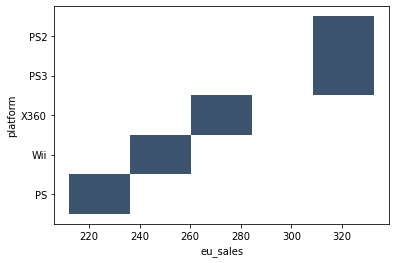

In [78]:
sns.histplot(
    
    data=top5_eu, 
    
    x="eu_sales", 
    
    y='platform', bins=5)

plt.show()

In Europe, the user chooses PS2, PS3 and X360 more often.

In [79]:
japan = pd.pivot_table(
    
    data, 
    
    index='platform', 
    
    values='jp_sales',
    
    aggfunc='sum'
    
).sort_values(by='jp_sales', ascending=False)

In [80]:
japan.head()

,jp_sales
platform,
DS,175.02
PS,138.32
PS2,137.54
SNES,116.55
3DS,100.62


In [81]:
top5_jp = japan.query('jp_sales > 100')

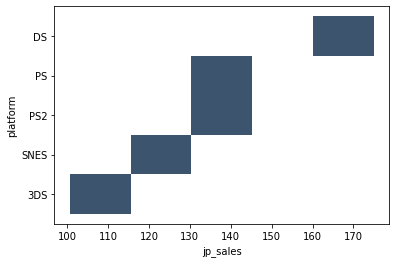

In [82]:
sns.histplot(
    
    data=top5_jp, 
    
    x="jp_sales", 
    
    y='platform', bins=5)

plt.show()

The Japanese user is different from everyone else. He likes DS, PS and PS2 in third place.

In [83]:
na_total_prop = (data['na_sales'].sum() / data['total_sales'].sum()) * 100

In [84]:
eu_total_prop = (data['eu_sales'].sum() / data['total_sales'].sum()) * 100

In [85]:
jp_total_prop = (data['jp_sales'].sum() / data['total_sales'].sum()) * 100

In [86]:
pie = [na_total_prop, eu_total_prop, jp_total_prop]

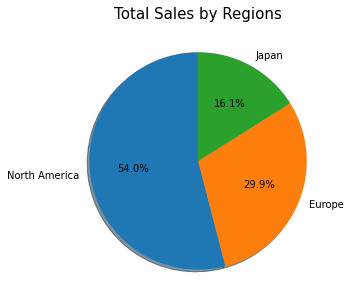

In [89]:
labels = 'North America', 'Europe', 'Japan'

plt.figure(figsize=(12,5))

plt.pie(
    
    x=pie,
    
    labels=labels, 
    
    autopct='%1.1f%%',
    
    shadow=True, 
    
    startangle=90

)
plt.title('Total Sales by Regions',fontsize = 15)

plt.show()


Most games are bought by users from the USA, followed by the EU and Japan.

In [90]:
north_america_genre = pd.pivot_table(
    
    data, 
    
    index='genre', 
    
    values='na_sales',
    
    aggfunc='sum'
    
).sort_values(by='na_sales', ascending=False)


In [91]:
north_america_genre.head()

,na_sales
genre,
Action,861.49
Sports,671.20
Shooter,584.83
Platform,444.44
Misc,398.41


In [92]:
top5_na_genre = north_america_genre.query('na_sales > 400')

In [93]:
genre_na_prop = (
    
    top5_na_genre['na_sales'] / top5_na_genre['na_sales'].sum()) * 100

In [94]:
genre_na_prop.head()

genre
Action      33.626208
Sports      26.198692
Shooter     22.827445
Platform    17.347656
Name: na_sales, dtype: float64

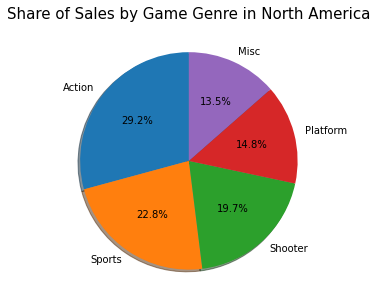

In [102]:
labels = 'Action', 'Sports', 'Shooter', 'Platform', 'Misc'

prop_na = [29.21, 22.75,  19.68, 14.80, 13.53]

plt.figure(figsize=(12,5))

plt.pie(
    
    x = prop_na,
    
    labels=labels, 
    
    autopct='%1.1f%%',
    
    shadow=True, 
    
    startangle=90

)

plt.title('Share of Sales by Game Genre in North America',fontsize = 15)

plt.show()


The genres that sell the most in North America are action, sports and shooting.

In [96]:
europe_genre = pd.pivot_table(
    
    data, 
    
    index='genre', 
    
    values='eu_sales',
    
    aggfunc='sum'
    
).sort_values(by='eu_sales', ascending=False)

In [97]:
europe_genre.head()

,eu_sales
genre,
Action,510.38
Sports,371.33
Shooter,314.52
Racing,234.49
Misc,210.44


In [98]:
top5_eu_genre = europe_genre.query('eu_sales > 200')

In [99]:
genre_eu_prop = (
    
    top5_eu_genre['eu_sales'] / top5_eu_genre['eu_sales'].sum()) * 100

In [100]:
genre_eu_prop.head()

genre
Action     31.098735
Sports     22.626069
Shooter    19.164493
Racing     14.288065
Misc       12.822638
Name: eu_sales, dtype: float64

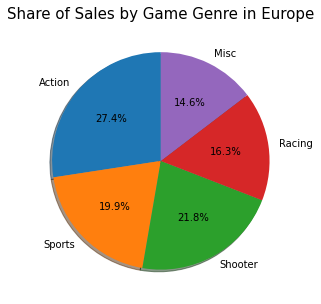

In [101]:
labels = 'Action', 'Sports', 'Shooter', 'Racing', 'Misc'

prop_eu = [21.4, 15.5, 17.03,  12.69, 11.42]

plt.figure(figsize=(12,5))

plt.pie(
    
    x = prop_eu,
    
    labels=labels, 
    
    autopct='%1.1f%%',
    
    shadow=True, 
    
    startangle=90

)

plt.title('Share of Sales by Game Genre in Europe',fontsize = 15)

plt.show()

In Europe, the most popular genres are action, sports, shooting and auto racing.

In [103]:
japan_genre = pd.pivot_table(
    
    data, 
    
    index='genre', 
    
    values='jp_sales',
    
    aggfunc='sum'
    
).sort_values(by='jp_sales', ascending=False)

In [104]:
japan_genre.head()

,jp_sales
genre,
Role-Playing,353.39
Action,160.14
Sports,134.93
Platform,130.71
Misc,105.56


In [105]:
top5_jp_genre = japan_genre.query('jp_sales > 100')

In [106]:
genre_jp_prop = (
    
    top5_jp_genre['jp_sales'] / top5_jp_genre['jp_sales'].sum()) * 100

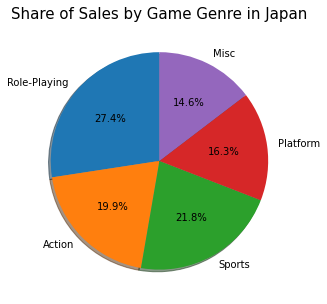

In [107]:
labels = 'Role-Playing', 'Action', 'Sports', 'Platform', 'Misc'

prop_jp = [39.87, 18.11, 15.20,  14.67, 12.12]

plt.figure(figsize=(12,5))

plt.pie(
    
    x = prop_eu,
    
    labels=labels, 
    
    autopct='%1.1f%%',
    
    shadow=True, 
    
    startangle=90

)

plt.title('Share of Sales by Game Genre in Japan',fontsize = 15)

plt.show()

In Japan, the most popular genres are role-playing games, sports and action. Thus, the Japanese population is most different from the rest of the studied regions.

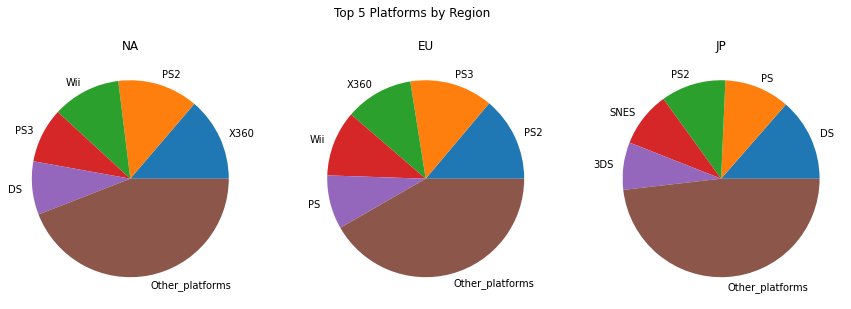

In [110]:
# we create list of regions

countries = data.columns[4:7]

# we draw a pie chart for each region

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# let's choose the 5 most selling platforms

fig.suptitle('Top 5 Platforms by Region')

for i in range(3):
    

  df_i = (data.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
    
  # let's put all the rest of the sales in Other_platforms

  df_i = df_i.append({
      
      'platform': 'Other_platforms',
      
      countries[i]: data[countries[i]].sum() - df_i[
          
          countries[i]].sum()}, ignore_index= True)
    
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

# Let's set the name of the region.
    
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

The category of other platforms is most common in all regions, however, we found differences between the platforms. 

The PS series is more successful in Europe, while in North America, in addition to the PS2, the X360 and Wii also find their place. 

Japan is the region that is most different: DS is in second place, and SNES and 3DS are absent in the rest of the regions.

Now we will analyze the relationship between rating and sales by region using the same methodology as in the previous steps, but this time using a histogram instead of a pie chart.

In [111]:
na_rating = pd.pivot_table(
    
    data, 
    
    index='rating', 
    
    values='na_sales',
    
    aggfunc='sum'
    
).sort_values(by='na_sales', ascending=False)

In [112]:
na_rating.head()

,na_sales
rating,
E,1274.24
unknown,1225.84
T,747.60
M,742.89
E10+,345.50


In [113]:
na_rating_sales = na_rating.query('na_sales > 100')

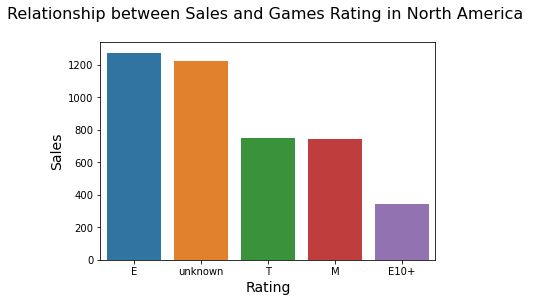

In [115]:
sns.barplot(data=na_rating_sales,
            
            x=na_rating_sales.index,
            
            y='na_sales')

plt.title('Relationship between Sales and Games Rating in North America \n',
          
          fontsize = 16, 
          
          color = 'Black')

plt.xlabel('Rating',fontsize = 14)

plt.ylabel('Sales',fontsize = 14)

plt.show()

The games that sell the most in North America belong to the category suitable for any audience. Secondly, an unknown category. The categories of teenagers and adults from 17 years old are equal, and the category from 10 years old is in last place.

In [116]:
eu_rating = pd.pivot_table(
    
    data, 
    
    index='rating', 
    
    values='eu_sales',
    
    aggfunc='sum'
    
).sort_values(by='eu_sales', ascending=False)

In [117]:
eu_rating.head()

,eu_sales
rating,
E,703.87
unknown,609.65
M,480.00
T,421.79
E10+,183.35


In [118]:
eu_rating_sales = eu_rating.query('eu_sales > 0.6')

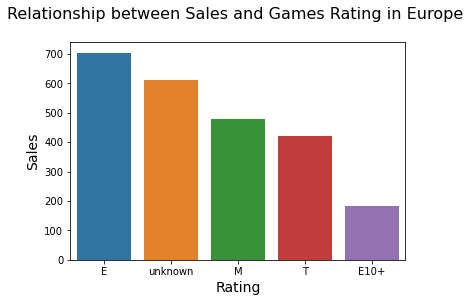

In [120]:
sns.barplot(data=eu_rating_sales,
            
            x=eu_rating_sales.index,
            
            y='eu_sales')

plt.title('Relationship between Sales and Games Rating in Europe \n',
          
          fontsize = 16, 
          
          color = 'Black')

plt.xlabel('Rating',fontsize = 14)

plt.ylabel('Sales',fontsize = 14)

plt.show()

In Europe, as in North America, the category intended for all audiences is sold the most, but the second place is occupied by the unknown category, the third place is for adults from 17 years old, the fourth place is for teenagers, and the last is the category intended for an audience over 10 years old.

In [121]:
jp_rating = pd.pivot_table(
    
    data, 
    
    index='rating', 
    
    values='jp_sales',
    
    aggfunc='sum'
    
).sort_values(by='jp_sales', ascending=False)

In [122]:
jp_rating.head()

,jp_sales
rating,
unknown,836.74
E,197.96
T,150.70
M,63.58
E10+,40.20


In [123]:
jp_rating_sales = jp_rating.query('jp_sales > 1.4')

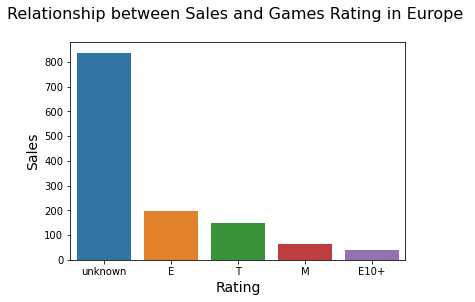

In [126]:
sns.barplot(data=jp_rating_sales,
            
            x=jp_rating_sales.index,
            
            y='jp_sales')

plt.title('Relationship between Sales and Games Rating in Europe \n',
          
          fontsize = 16, 
          
          color = 'Black')

plt.xlabel('Rating',fontsize = 14)

plt.ylabel('Sales',fontsize = 14)

plt.show()

In Japan, games classified as unknown are sold more, followed by a category for all audiences, in third place for teenagers, in fourth place for adults and in fifth place for children from 10 years old, as in other regions.

Summing up, we can say that the rating affects game sales by region, and the category for all audiences is the one that sells the most in all the regions studied. In second place in popularity is an unknown category, with the exception of Japan, where it is sold the most. The category from 10 years is the one that occupies the last position in all regions.

# Hypothesis Testing

H0 — the average user ratings of the Xbox One platform are equal to the average user ratings of the PC platform.

H1 — The average user ratings of the Xbox One platform differ from the average user ratings of the PC platform.

Let's create new data frames in which we will save the ratings of the Xbox One and PC platforms.

In [128]:
x_one = data.query('platform == "XOne"')['user_score'].dropna()

In [129]:
pc = data.query('platform == "PC"')['user_score'].dropna()

First we will look at the variation of the data, as well as the median, mean, first and third quartiles.

In [130]:
x_one.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [131]:
pc.describe()

count    752.000000
mean       7.062367
std        1.533655
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

Let's move on to calculating the variance of two variables.

In [132]:
print('Dispersion of the Xbox One:', x_one.var(ddof=1))

Dispersion of the Xbox One: 1.9069968429360702


In [133]:
print('PC Variance:', pc.var(ddof=1))

PC Variance: 2.3520971860214734


The variability of data on the PC is higher than on the Xbox One.

In [134]:
alpha = .05

results = st.ttest_ind(
    
    pc, 
    
    x_one, 
    
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    
    print('We reject the null hypothesis')
    
else:
    
    print('Failed to reject the null hypothesis')

p-значение: 5.2790724212074636e-06
We reject the null hypothesis


Average user ratings on Xbox One and PC differ.

We do the same with the action and sports genres.

In [136]:
action = data.query('genre == "Action"')['user_score'].dropna()

In [137]:
sports = data.query('genre == "Sports"')['user_score'].dropna()

In [138]:
action.describe()

count    1795.000000
mean        7.057270
std         1.423832
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [139]:
sports.describe()

count    1081.000000
mean        6.951434
std         1.619585
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [140]:
print('Variance of the action movie genre:', action.var(ddof=1))

Variance of the action movie genre: 2.027298006664127


In [141]:
print('Variance of the sports genre:', sports.var(ddof=1))

Variance of the sports genre: 2.6230558125192656


The variance of the sports genre is slightly higher than that of the action.

In [142]:
alpha = .05

results = st.ttest_ind(
    
    action, 
    
    sports, 
    
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    
    print("We reject the null hypothesis")
    
else:
    
    print("Failed to reject the null hypothesis")

p-value: 0.07607291840585198
Failed to reject the null hypothesis


There is no difference between the means of an action movie and a sports genre.

# General conclusions of the report

· At the beginning of the study, we saw that there were several variables that had a data type that did not correspond to them, so we decided to change their correct type. This was the case for the variables user_score and critical_score. We also saw that the rating variable has the classification 'tbd', and we found out what the rating means, subject to clarification, so we decided to change it to unknown so that it does not affect the analysis.

· During the investigation, we saw that video game sales followed a growth trend from the 90s until about 2015.

· Not all platforms have almost the same lifecycle, some manage to stay on the market longer, like the PS series, while others disappear earlier, like the DS.

· The average life of the platform is 10 years.  

· The greatest spread of median values in the X360, PS3, WiiU, Xone and PS4.

· Almost all platforms have outliers.

· The smallest spread of median values in XB, GBA, PC, PSV and DC.

· X360 and PS3 have the most expensive games.

· The cheapest PC and PSV games.

· In the annual release of games, all the leading platforms follow the same trend, experiencing a boom that gradually decreases throughout the 2010s, the same can be said about sales.

· The distribution of sales data between the platforms with the highest sales volume is very similar, the medians almost overlap, as can be seen on the graphs of boxes with whiskers. The farthest platform is DS, which, we can say, also belongs to another time, that is, it appears in history earlier and disappears earlier as well.

· Sales depend on critics ratings. User ratings does not affect sales in any way, while it has a high correlation with the critics rating.

· In the case when the platform has gone through a full cycle, sales are weakly dependent on the critics assessment, but there is already a relationship with the users assessment, it is also weak, but there is compared to the PS4. The relationship between critics and users is much higher.

· The category "Other platforms" is most common in all regions, but we found differences between the other platforms. The PS series is more successful in Europe, while in North America, in addition to the PS2, the X360 and Wii also find their place. Japan is the region that is most different: DS is in second place, and SNES and 3DS are absent in the rest of the regions.

· Taking into account all platforms and regions, the genres that report the highest sales are classified as platformers, sports and shooters. Except Japan, where role-playing games are stronger.

· The user profile by region shows similarities between North American and European consumers with slight differences in the preferences of a particular platform, but Japanese consumers differ the most. In this case, preference is given to the DS platform, while in North America and Europe, the PS series is the leading platform.

· In terms of total sales, the largest part of the pie is in the United States, whose sales account for more than half of total sales in the world, followed by Europe, which accounts for a third of total sales. Japan would be in last place with just over a quarter of total sales.  

· According to genre tastes, North America and Europe are more similar, in these two regions the action genre is sold the most, they differ in that in North America the sports genre is in second place, and in Europe the shooter genre.

· As in previous cases, the note is given by the Japanese audience, which differs from other regions. Here the genre of role-playing games has primacy over the rest.

· In the section devoted to the impact of the ESBD rating on sales, we saw that the category for all audiences is the one that sells the most in all the regions studied. In second place in popularity is an unknown category, with the exception of Japan, where it is sold the most. The category from 10 years is the one that occupies the last position in all regions.

· In the study, we compared the hypothesis of whether the average user's rating differs on the Xbox One and PC platforms, and the answer was negative, they are the same.

· We also tested the hypothesis of whether the rating of the average user of the action and sports genres differs, and received the answer that yes, they are different.

# Recommendations

· The most promising platforms are: PS4, XOne. Their first release was in 2013, so they have a good chance to prove themselves on the market until 2023.

· The PC platform is stable, but for many years, it has not become a leader, so it is more of a stable option.

· Sales and critical rating have a moderate relationship. User reviews and sales have a weak relationship. Here we can recommend companies engaged in the sale of games, and it is that it is better to direct money on evaluation campaigns to specialized critics, who in our time would consist of bloggers. Always with caution, as the relationship is moderate, but by no means strong. 

· The Japanese audience is very different from the European and North American ones, so if you want to succeed in this market, you have to take into account these differences in tastes regarding platforms and game genres.

· Where more games are sold worldwide is in North America, so it would be advisable to pay special attention to this fact and redirect campaign resources to this territory, where there are more opportunities for sales.

· Sports games are more successful in North America than in other regions, and this should be kept in mind when creating new games. 

· The official classification of games affects the number of sales, while games without classification and games suitable for all audiences are sold the most. In this sense, the defined category provides a freer sale without age restrictions established by the rules.

· Differentiating the audience that prefers action and sports games when developing a campaign strategy is important for increasing sales in these areas, because, as we saw when testing hypotheses, the averages between these two types of games differ.